 importando bibliotecas e funções que são comumente usadas para pré-processamento de dados, redução de dimensionalidade, agrupamento e visualização de dados.

In [144]:
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer
from sklearn.calibration import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

from matplotlib import pyplot as plt

Função que é usada para carregar um conjunto de dados, remover colunas desnecessárias, normalizar os recursos e reduzir a dimensionalidade dos dados para 3 componentes principais.

In [145]:
def normalize_and_reduce():
    # Carregando os dados
    df = pd.read_csv('data/zoo.data', header=None)
    
    # Removendo a primeira coluna
    df = df.drop(columns=[0])

    # Convertendo o dataframe em um NumpyArray
    data = df.values

    # Criando um objeto MinMaxScaler
    scaler = MinMaxScaler()

    # Ajustando e transformando os dados para que todos os recursos estejam no intervalo [0, 1]
    X = scaler.fit_transform(data)
    
    # Criando um objeto PCA com 3 componentes
    pca = PCA(n_components=3)

    # Ajustando o PCA nos dados e aplicando a redução de dimensionalidade
    X_pca = pca.fit_transform(X)
    
    # Retornando o DataFrame que será usado no kmeans e os labels corretos (para comparar depois)
    return pd.DataFrame(X_pca), pd.DataFrame(X)

Função que é usada para realizar a análise do método do cotovelo em um conjunto de dados e visualizar os resultados.

In [146]:
def calculate_elbow(data, k_min, k_max):
    # Inicializando o modelo KMeans
    kmeans = KMeans(n_init=15)

    # Criando o visualizador de cotovelo com o modelo KMeans e um intervalo de k
    vis = KElbowVisualizer(kmeans, k=(k_min,k_max))

    # Ajustando os dados ao visualizador
    vis.fit(data)

    # Exibindo a visualização
    vis.poof()


função usada para calcular e visualizar a pontuação da silhueta para diferentes números de clusters em um conjunto de dados. 

In [147]:
def silhouette(dataset, k_values, init_method="k-means++", n_init=10, algorithm="lloyd"):
    # Convertendo o dataframe em um NumpyArray
    data = dataset.values

    # Criando subplots para visualizar vários gráficos de silhueta
    fig, ax = plt.subplots((len(k_values)+1)//2, 2, figsize=(15,8))

    for i in k_values:
        # Inicializando e ajustando o modelo KMeans
        kmeans = KMeans(n_clusters=i, init=init_method, n_init=n_init, algorithm=algorithm)
        kmeans.fit(dataset)

        # Criando o visualizador de silhueta com o modelo KMeans
        row, col = divmod(i, 2)
        if (len(k_values)+1)//2 != 1:
            visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[row-1][col])
        else:
            visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

        # Ajustando os dados ao visualizador e exibindo a visualização
        visualizer.fit(data)

    plt.show()

In [148]:
def plot_3d_clusters(dataset, labels, title):
    # Criando uma figura
    fig = plt.figure(figsize=(10,10))

    # Adicionando um subplot 3D
    ax = fig.add_subplot(111, projection='3d')

    # Fazendo um gráfico de dispersão dos dados em 3 dimensões
    scatter = ax.scatter(dataset[0], dataset[1], dataset[2], c=labels, cmap="viridis")

    # Removendo as etiquetas dos eixos
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])

    # Definindo os rótulos dos eixos
    ax.set_xlabel("V1")
    ax.set_ylabel("V2")
    ax.set_zlabel("V3")

    # Definindo o título do gráfico
    ax.set_title(title)

    # Exibindo o gráfico
    plt.show()

In [149]:
dataset_PCA, df_n = normalize_and_reduce()

In [150]:
dataset_PCA

,0,1,2
0,-1.238935,0.036645,0.587096
1,-1.395346,-0.263081,0.036687
2,0.774761,1.459998,-0.297096
3,-1.238935,0.036645,0.587096
4,-1.374645,0.111358,0.041247
...,...,...,...
96,-1.385026,-0.226150,-0.016135
97,0.861167,-1.184910,1.158981
98,-1.374645,0.111358,0.041247
99,1.128327,-0.603268,0.969317


In [151]:
df_n

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,0.0,0.0,1.0,0.000000
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0,0.000000
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.00,1.0,0.0,0.0,0.500000
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,0.0,0.0,1.0,0.000000
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.25,1.0,0.0,1.0,0.000000
97,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.75,0.0,0.0,0.0,0.833333
98,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0,0.000000
99,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0,1.000000


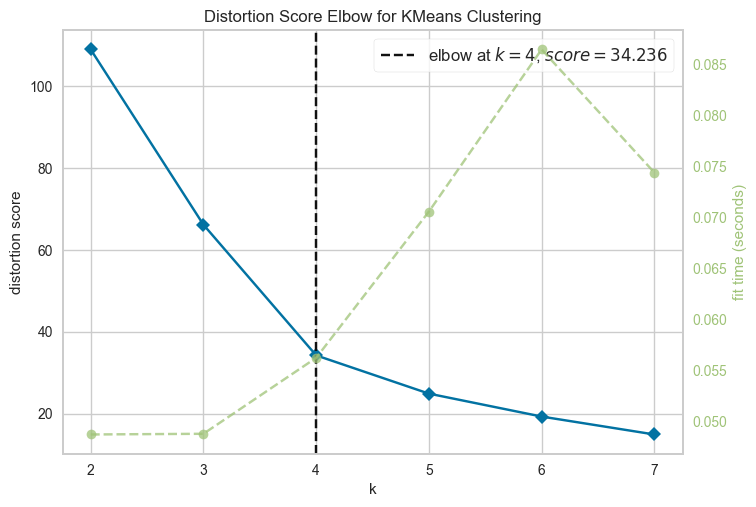

In [152]:
calculate_elbow(dataset_PCA, k_min=2, k_max=8)

Com base no gráfico do método do cotovelo, o “cotovelo” parece estar em torno de k=4. Isso significa que a soma dos erros quadrados (SSE) começa a diminuir mais lentamente após k=4, o que sugere que 4 é um bom número de clusters para este conjunto de dados. Entretando, vamos calcular a silhouette dos k == 3, 4 e 5 confirmar que k == 4 é o melhor valor.

Silhouette Score(n=3): 0.5382631726378865
Silhouette Score(n=4): 0.6223782788567949
Silhouette Score(n=5): 0.6403470673118099


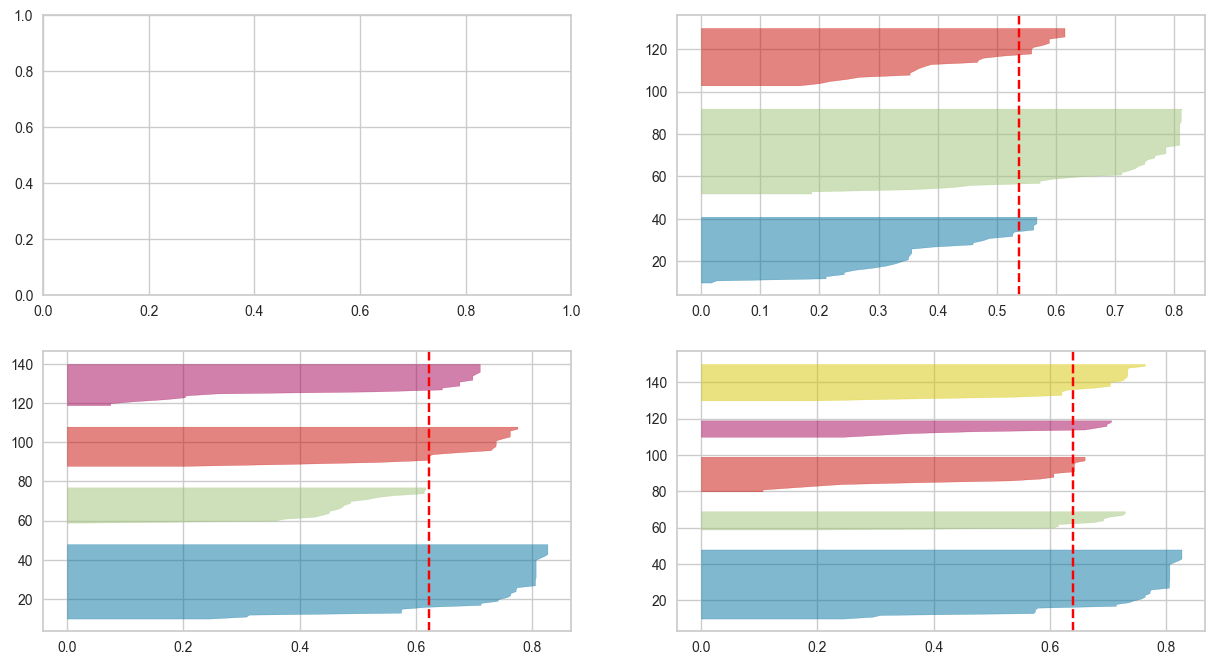

In [153]:
ks = [3, 4, 5]

for i in ks:
    kmean = KMeans(n_clusters=i, n_init=10)
    kmean.fit(dataset_PCA)
    label = kmean.predict(dataset_PCA)
    print(f'Silhouette Score(n={i}): {silhouette_score(dataset_PCA, label)}')
silhouette(dataset_PCA, ks)

Observando o resultado dos gráficos e os valores, podemos afirmar que 5 grupos será a melhor opção, uma vez que todos os objetos estão acima da média em seu grupo e o valor retornado é o maior. Observando os grupos para K = 5:

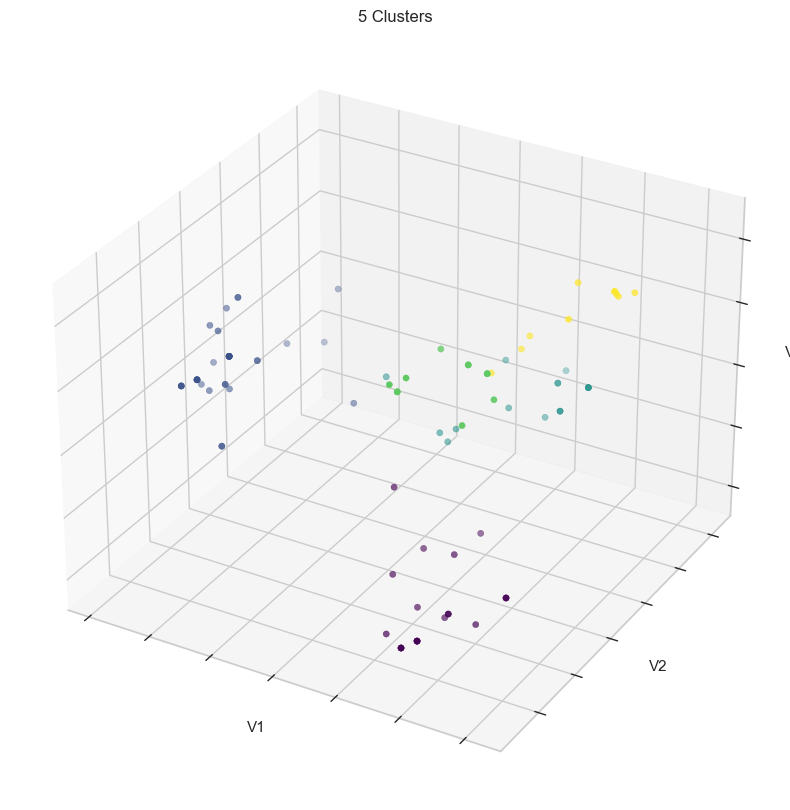

In [154]:
kmeans = KMeans(n_clusters=5, n_init=10)
kmeans.fit(dataset_PCA)

plot_3d_clusters(dataset_PCA, kmeans.labels_, "5 Clusters")

plt.show()

 Observando os grupos para K = 4:

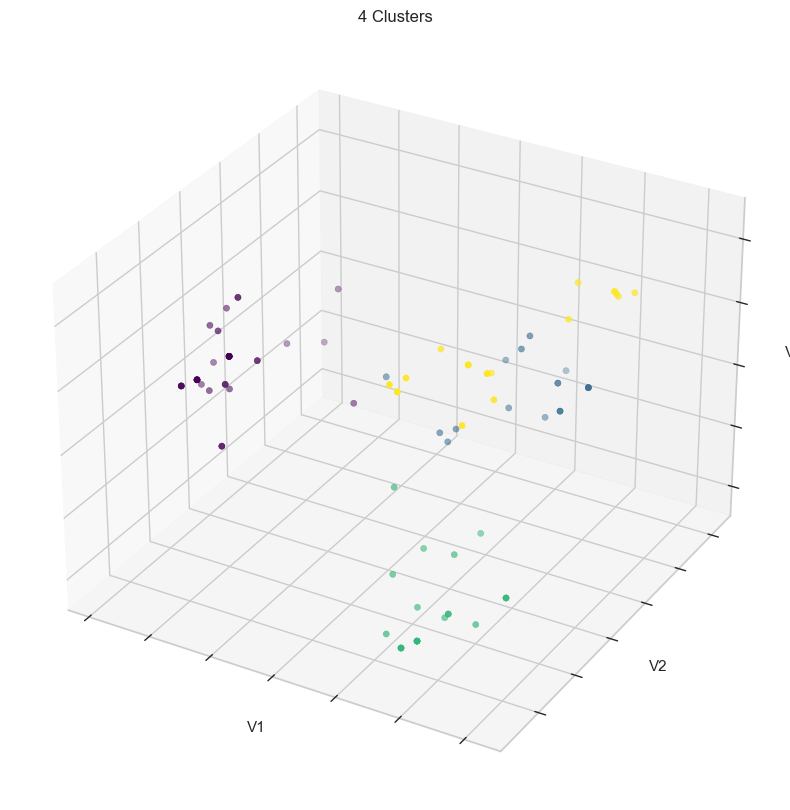

In [155]:
kmeans = KMeans(n_clusters=4, n_init=10)
kmeans.fit(dataset_PCA)

plot_3d_clusters(dataset_PCA, kmeans.labels_, "4 Clusters")

plt.show()

Observando os grupos com o dataset original:

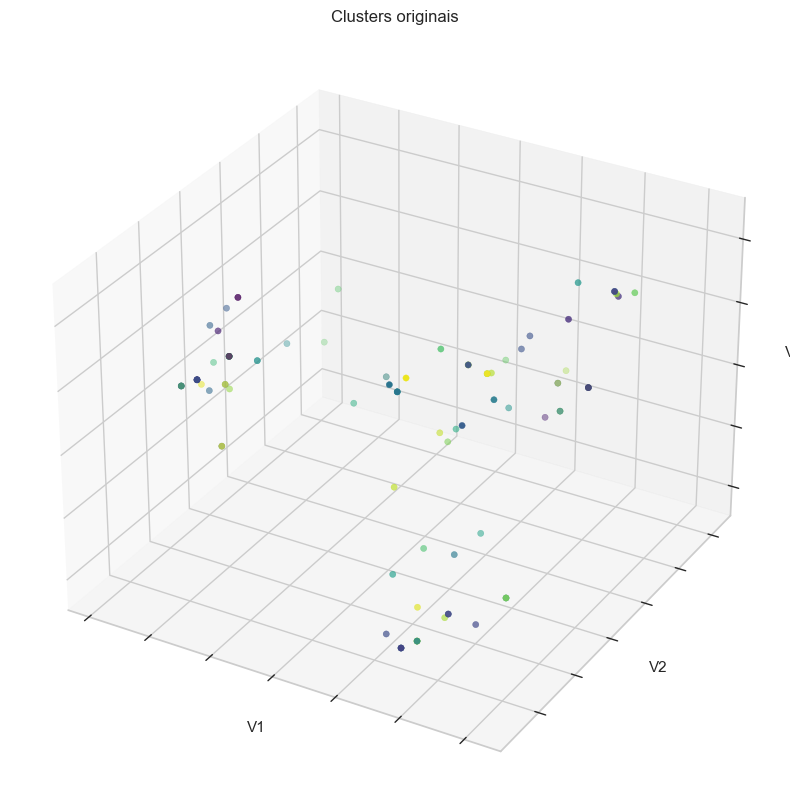

In [156]:
df = pd.read_csv('data/zoo.data', header=None)
target = df[0]

# Convertendo os nomes dos animais em números
le = LabelEncoder()
target_encoded = le.fit_transform(target)

plot_3d_clusters(dataset_PCA, target_encoded, "Clusters originais")

plt.show()